In [1]:
# Imports
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid")
conn = sqlite3.connect("imdb.db")

## Qual a Mediana de Avaliação dos Filmes em Relação ao Ano de Estréia

In [5]:
consulta =  '''
            SELECT rating AS Rating, premiered FROM ratings
            JOIN titles ON ratings.title_id = titles.title_id
            WHERE premiered <= 2022 AND type ='movie'
            ORDER BY premiered
            '''
resultado = pd.read_sql_query(consulta,conn)
display(resultado)

,Rating,premiered
0,6.4,1896
1,4.4,1897
2,3.9,1899
3,3.7,1899
4,6.0,1900
...,...,...
266292,6.6,2021
266293,4.8,2021
266294,8.3,2021
266295,6.0,2021


In [11]:
ratings = []
for year in set(resultado['premiered']):
    ratings.append(np.median(resultado[resultado['premiered']==year]['Rating']))
type(ratings)


list

In [12]:
ratings[1:10]
anos = list(set(resultado['premiered']))
anos[1:10]

[1897, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906]

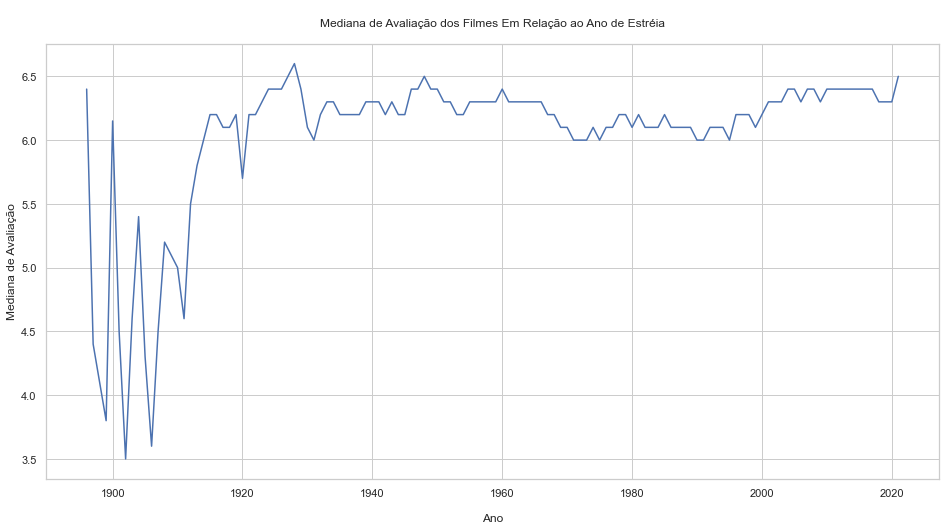

In [13]:
plt.figure(figsize = (16,8))
plt.plot(anos, ratings)
plt.xlabel('\nAno')
plt.ylabel('Mediana de Avaliação')
plt.title('\nMediana de Avaliação dos Filmes Em Relação ao Ano de Estréia\n')
plt.show()